# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Set random seed for replicable results
np.random.seed(7)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set bold printing params
bold = "\033[1m"
reset = "\033[0;0m"

# Path to the API request
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q="

# Create lists to store data
city_name = []
city_cloud = []
city_country = []
city_date = []
city_humidity = []
city_lat = []
city_lon = []
city_maxtemp = []
city_windspeed = []

# Print log header
print("Beginning Data Retrieval\n-----------------------------")

# Loop through cities to request data
for city in cities:
    non_json_response = requests.get(query_url + city)
    response = non_json_response.json()
    if non_json_response.status_code == 200:
        print(f"Processing Record {cities.index(city)} of {len(cities)} | {city}")
        city_name.append(city)
        city_cloud.append(response['clouds']['all'])
        city_country.append(response['sys']['country'])
        city_date.append(response['dt'])
        city_humidity.append(response['main']['humidity'])
        city_lat.append(response['coord']['lat'])
        city_lon.append(response['coord']['lon'])
        city_maxtemp.append(response['main']['temp_max'])
        city_windspeed.append(response['wind']['speed'])
    else:
        print('City'+bold+' not '+reset+'found. Skipping...')

# Print log footer
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

# Organize data in a dict
weather_data = {'City': city_name, 
                'Cloudiness': city_cloud,
                'Country': city_country,
                'Date': city_date,
                'Humidity': city_humidity,
                'Lat': city_lat,
                'Lng': city_lon,
                'Max Temp': city_maxtemp,
                'Wind Speed': city_windspeed}

# Transform data into a pandas dataframe
weather_df = pd.DataFrame(weather_data)

Beginning Data Retrieval
-----------------------------
Processing Record 0 of 608 | mataura
Processing Record 1 of 608 | petropavlovsk-kamchatskiy
Processing Record 2 of 608 | pimentel
Processing Record 3 of 608 | susehri
City not found. Skipping...
Processing Record 5 of 608 | apomu
Processing Record 6 of 608 | puerto ayora
Processing Record 7 of 608 | ushuaia
Processing Record 8 of 608 | ancud
City not found. Skipping...
Processing Record 10 of 608 | ponta delgada
Processing Record 11 of 608 | glinka
Processing Record 12 of 608 | henties bay
City not found. Skipping...
Processing Record 14 of 608 | okato
City not found. Skipping...
Processing Record 16 of 608 | hermanus
Processing Record 17 of 608 | kilindoni
Processing Record 18 of 608 | longyearbyen
Processing Record 19 of 608 | candelaria
Processing Record 20 of 608 | castro
Processing Record 21 of 608 | bandarbeyla
City not found. Skipping...
Processing Record 23 of 608 | albany
Processing Record 24 of 608 | cukai
Processing Reco

Processing Record 205 of 608 | maniitsoq
Processing Record 206 of 608 | liverpool
Processing Record 207 of 608 | saldanha
Processing Record 208 of 608 | cururupu
Processing Record 209 of 608 | pangnirtung
City not found. Skipping...
Processing Record 211 of 608 | hithadhoo
Processing Record 212 of 608 | penzance
Processing Record 213 of 608 | kendari
Processing Record 214 of 608 | husavik
Processing Record 215 of 608 | makinsk
Processing Record 216 of 608 | high level
Processing Record 217 of 608 | fukue
Processing Record 218 of 608 | puerto narino
Processing Record 219 of 608 | marsa matruh
Processing Record 220 of 608 | fort nelson
Processing Record 221 of 608 | makakilo city
Processing Record 222 of 608 | zhanaozen
City not found. Skipping...
Processing Record 224 of 608 | wysokie mazowieckie
Processing Record 225 of 608 | gorele
Processing Record 226 of 608 | palmer
Processing Record 227 of 608 | moose factory
Processing Record 228 of 608 | namatanai
Processing Record 229 of 608 | 

Processing Record 410 of 608 | tuban
Processing Record 411 of 608 | ahipara
Processing Record 412 of 608 | gull lake
Processing Record 413 of 608 | lasa
Processing Record 414 of 608 | faanui
Processing Record 415 of 608 | lityn
Processing Record 416 of 608 | coquimbo
Processing Record 417 of 608 | brighton
City not found. Skipping...
Processing Record 419 of 608 | vinderup
Processing Record 420 of 608 | sayyan
Processing Record 421 of 608 | ranong
Processing Record 422 of 608 | montemor-o-novo
Processing Record 423 of 608 | port lincoln
Processing Record 424 of 608 | shar
Processing Record 425 of 608 | bukama
Processing Record 426 of 608 | aleksandrovka
Processing Record 427 of 608 | atherton
Processing Record 428 of 608 | ulaanbaatar
Processing Record 429 of 608 | ukiah
Processing Record 430 of 608 | casper
Processing Record 431 of 608 | ouallam
Processing Record 432 of 608 | abrau-dyurso
Processing Record 433 of 608 | mendi
Processing Record 434 of 608 | saint-georges
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Export to csv file
weather_df.to_csv("weather_data.csv")

# Display first 5 dataframe rows
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,82,NZ,1562872459,89,-46.19,168.86,279.820,2.24
1,petropavlovsk-kamchatskiy,90,RU,1562872459,100,53.05,158.65,284.150,1.00
2,pimentel,19,BR,1562872460,50,-3.70,-45.50,304.387,2.69
3,susehri,12,TR,1562872460,95,40.16,38.09,284.987,7.67
4,apomu,75,NG,1562872460,88,6.85,3.21,298.150,4.60


In [5]:
# Set current date
current_day = time.strftime("%D", time.localtime(weather_df['Date'][0]))

# Create scatter plot function for latitude as abscissa
def plot_x_lat(y, y_name, unit):
    plt.figure(figsize=(20,10))
    plt.scatter(x=weather_df['Lat'], 
                y=y,
                )
    plt.title(f"City Latitude vs. {y_name} ({current_day})")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_name} ({unit})")
    plt.grid()
    plt.savefig(f"{y_name} vs latitude.png")
    plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

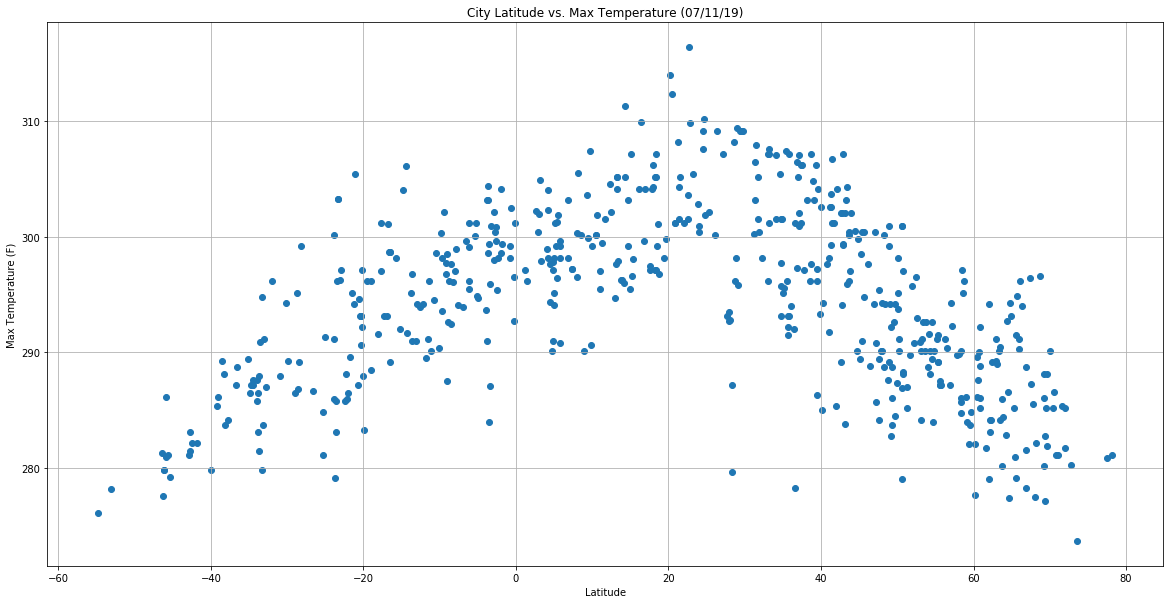

In [6]:
plot_x_lat(weather_df['Max Temp'], "Max Temperature", "F")

#### Latitude vs. Humidity Plot

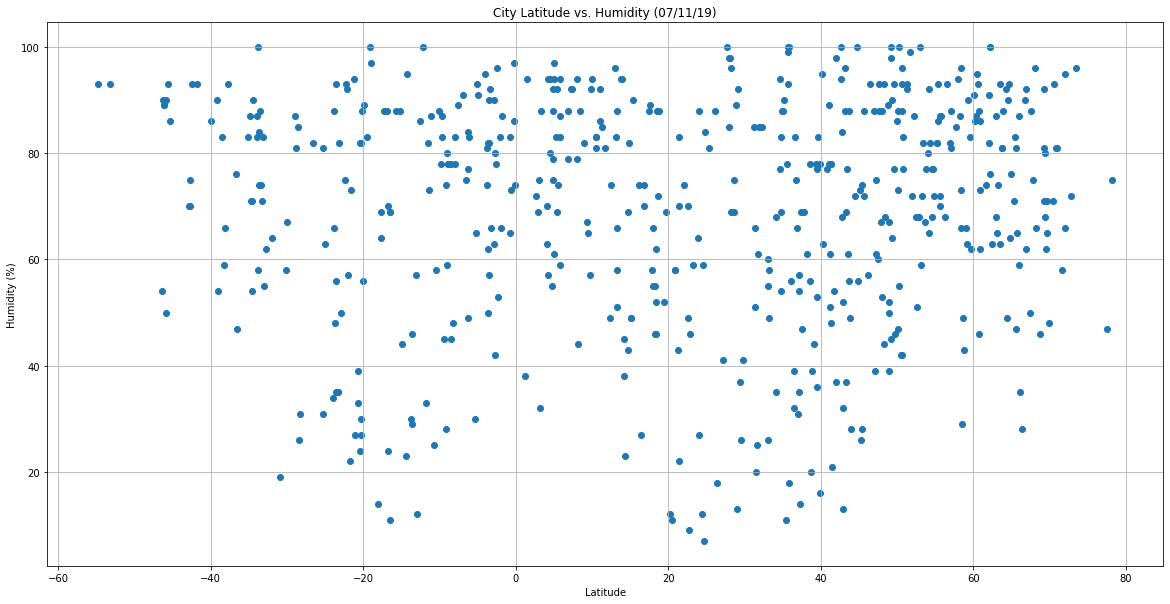

In [7]:
plot_x_lat(weather_df['Humidity'], "Humidity", "%")

#### Latitude vs. Cloudiness Plot

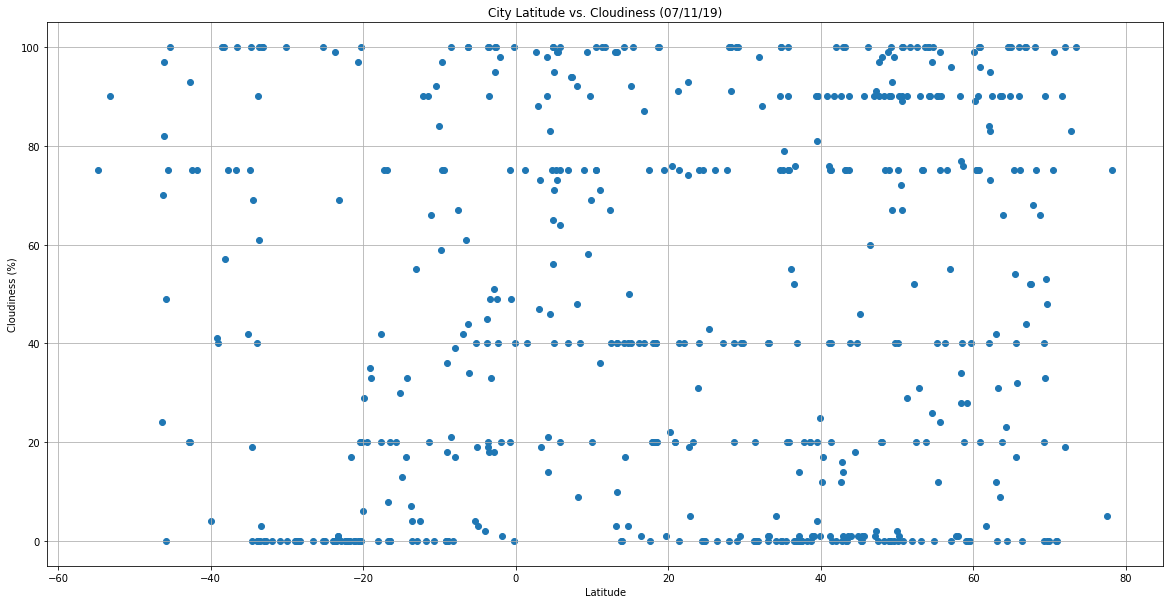

In [8]:
plot_x_lat(weather_df['Cloudiness'], "Cloudiness", "%")

#### Latitude vs. Wind Speed Plot

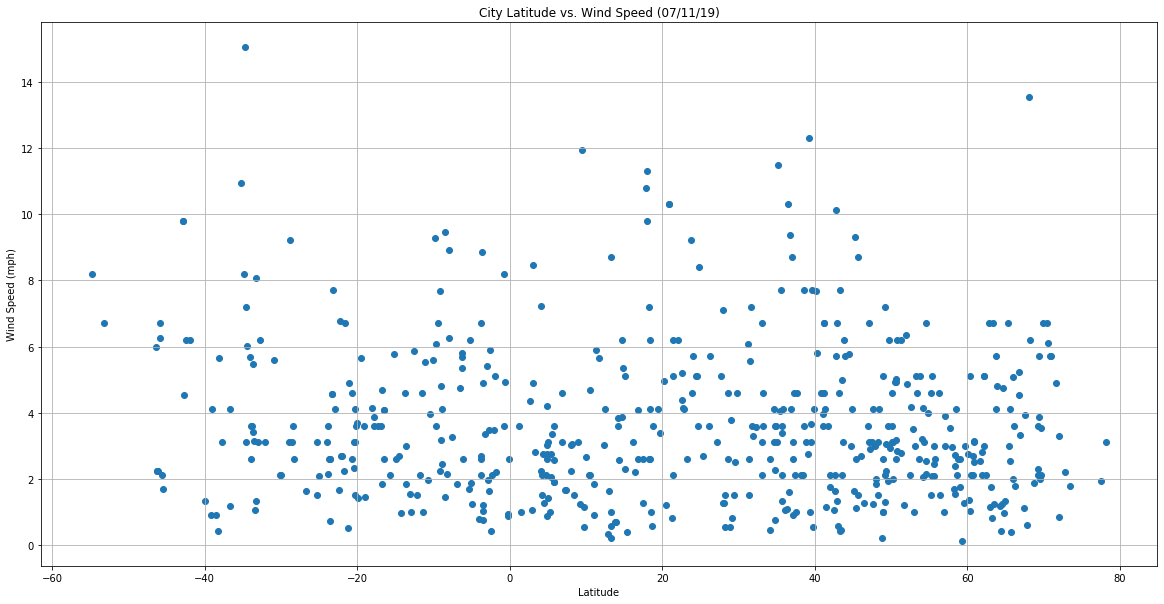

In [9]:
plot_x_lat(weather_df['Wind Speed'], "Wind Speed", "mph")